# Money Markets

## Financial Markets

### UChicago Financial Mathematics

#### September 2024

* Mark Hendricks
* hendricks@uchicago.edu

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

import sys
sys.path.insert(0, '../cmds')
#from treasury_cmds import *

# Overview of Money Markets

<img src='../refs/money_markets_BB.png'>

Reference: Bloomberg `BTMM`

***

# Fed Funds Rate

The Fed Funds rate is the rate at which private banks agree to lend each other money overnight.
- It is a transaction between two private parties, so the rate is determined by market forces.
- Still, the Fed has a great ability to manipulate this rate through the money supply.
- Thus, monetary policy is typically discussed in terms of targeting the Fed Funds rate.
- The rate gets its name because the Fed sets a reserve requirement that the banks must have in their vaults overnight. 
- Thus, the overnight lending between banks is really about having the funds mandated by the Fed.

In [2]:
filename = '../data/fed_data.xlsx'
info = pd.read_excel(filename,sheet_name='info').set_index('ticker (FRED)')
data = pd.read_excel(filename,sheet_name='data').set_index('date')
#refrates.columns = ['Tbill 3m','FedFunds Effective','SOFR']

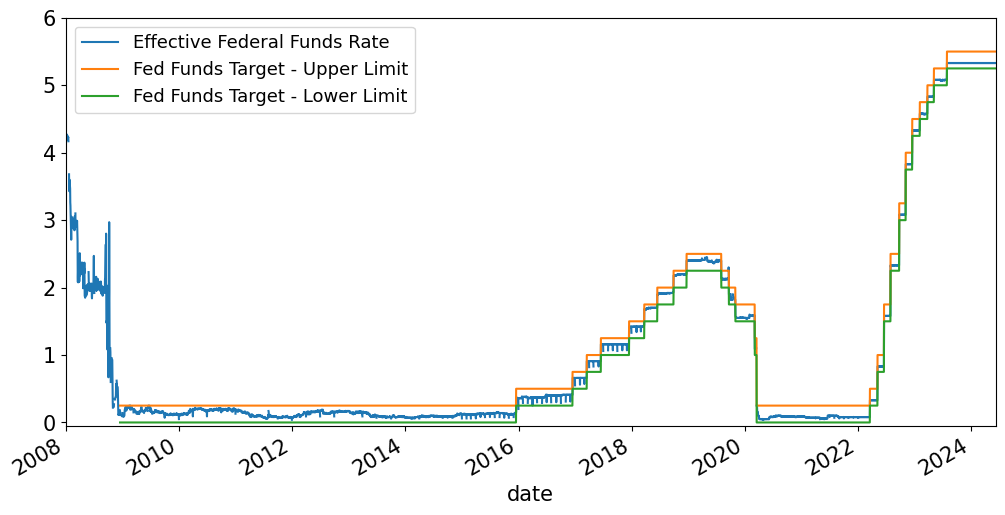

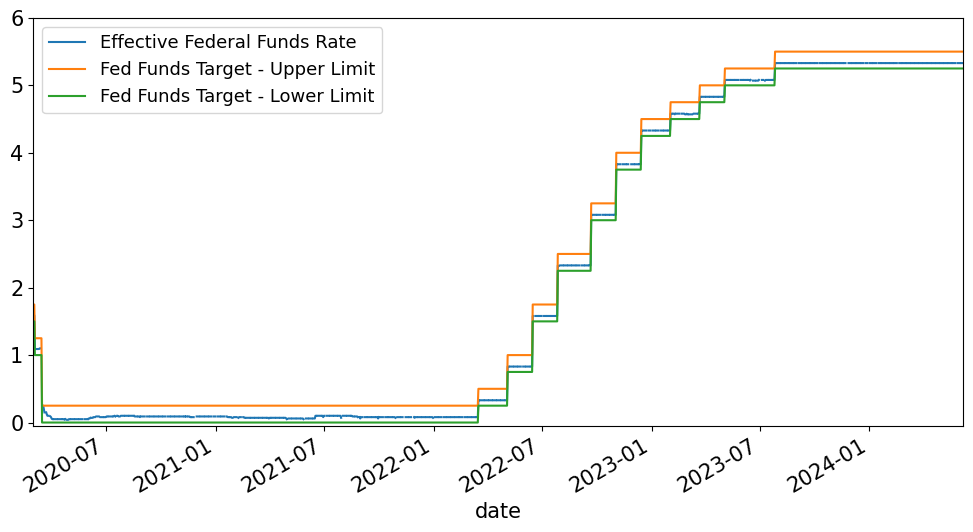

In [3]:
ticks = ['EFFR','DFEDTARU','DFEDTARL']
leg = info.loc[ticks,'description'].to_list()

data[ticks].plot(xlim=('2008',data.index[-1]),ylim=[-.05,6])
plt.legend(leg)
plt.show()

data[ticks].plot(xlim=('2020-03-01',data.index[-1]),ylim=(-.05,6))
plt.legend(leg)
plt.show()

## Excess Reserves

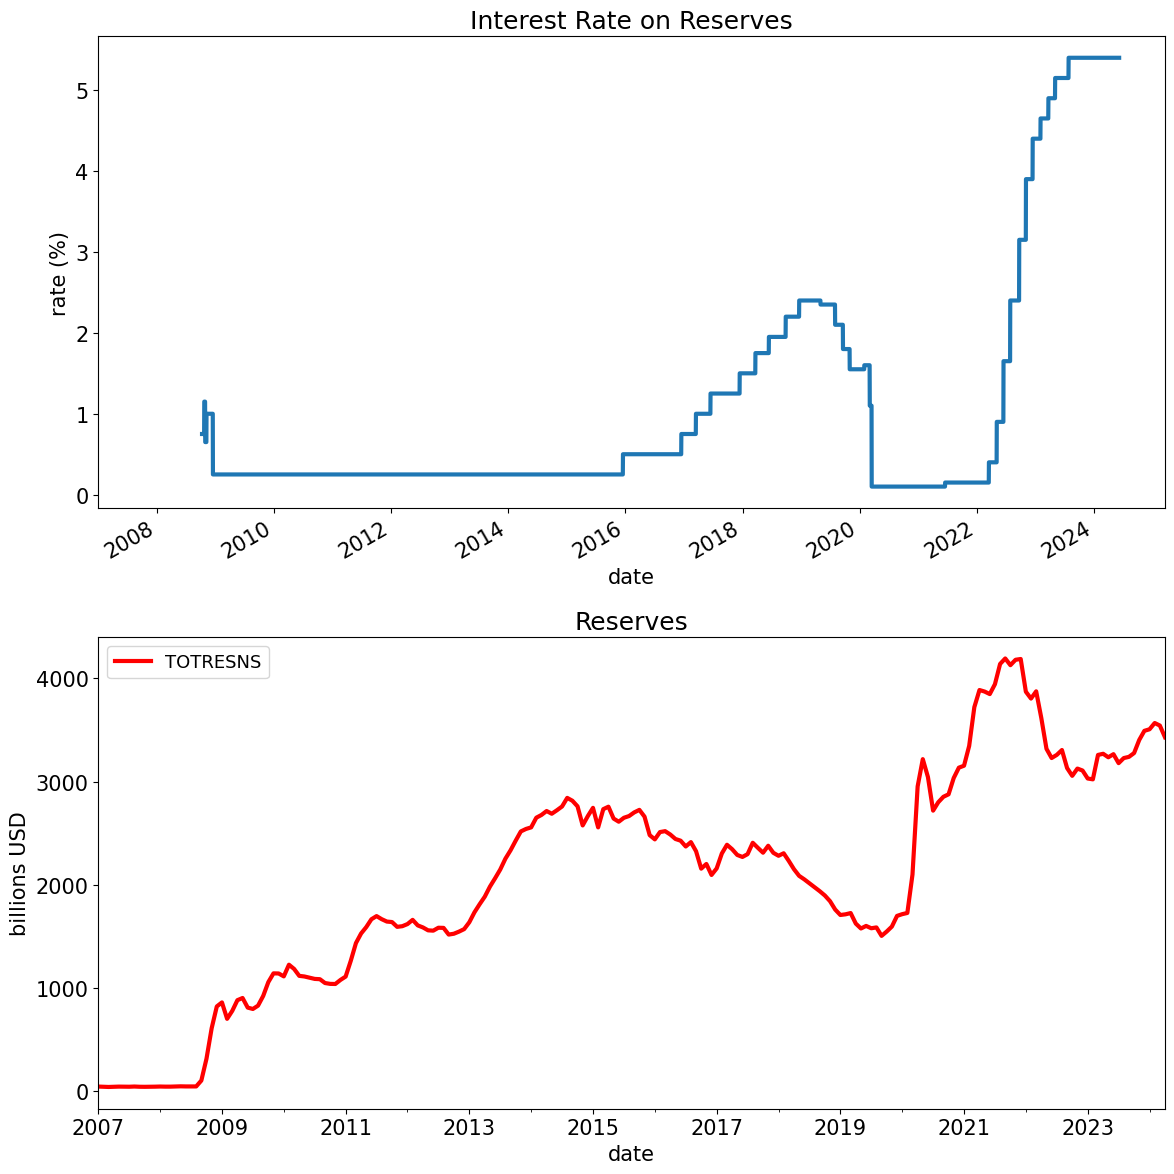

In [4]:
ioer = data[['IOER']].dropna().rename(columns={'IOER':'reserve rate'})
iorb = data[['IORB']].dropna().rename(columns={'IORB':'reserve rate'})
rate_reserves = pd.concat([ioer.iloc[:-1], iorb],axis=0)

fig, ax = plt.subplots(2,1,figsize=(12,12))
rate_reserves.plot(ax=ax[0], title='Interest Rate on Reserves', legend=[], xlim=('2007',None),ylabel='rate (%)',linewidth=3)
(data[['TOTRESNS']].dropna()).plot(ax=ax[1],title='Reserves',xlim=('2007',None),ylabel='billions USD',color='r',linewidth=3)

plt.tight_layout()
plt.show()

## The Discount Window

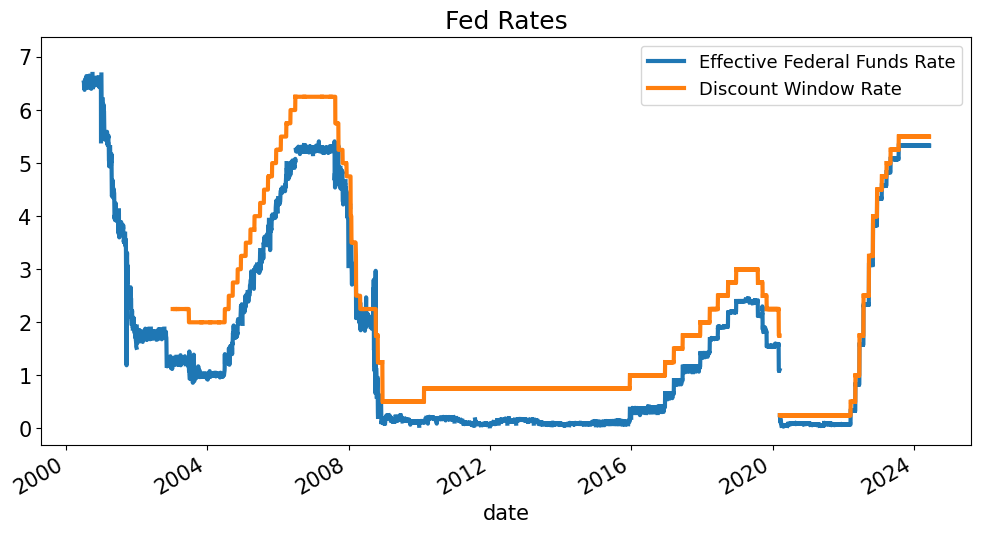

In [5]:
ticks = ['EFFR','DPCREDIT']
leg = info.loc[ticks,'description'].to_list()

data[ticks].plot(linewidth=3,title='Fed Rates')
plt.legend(leg)
plt.show()

![fed_bb_dashboard.png](../refs/fed_bb_dashboard.png)
#### Source
Bloomberg FDTR

***

# Secured Overnight Financing Rate (SOFR)

## The SOFR Index


The big picture
- Tracks the interbank overnight interest rate.

Sourcing:
- First published April 3, 2018
- SOFR is an index published by the NY Fed in cooperation with the U.S. Office of Financial Research.
- Based on Treasury repo transactions. 
    - Tri-party cleared and settled by the Bank of New York Mellon.
    - Bilateral cleared through FICC

### SOFR vs LIBOR

**LIBOR** is the London InterBank Offer Rate.
- Based on a panel of banks' estimates for borrowing/lending costs.
- For various reasons, it is being phased out.
- This phaseout was discussed for 10 years, but the market is finally making the transition.

### Key SOFR Aspects

Secured
- Rate of collateralized borrowing/lending via repo on U.S. Treasuries.

Overnight
- Rate is historic, based on the previous overnight lending. 
- Rate is backed by actual transactions, not surveys or estimates.
- No set of tenors (term structure) to SOFR. It is just an overnight rate. 
- One can impute a term structure of SOFR-related rates from derivatives based on SOFR.

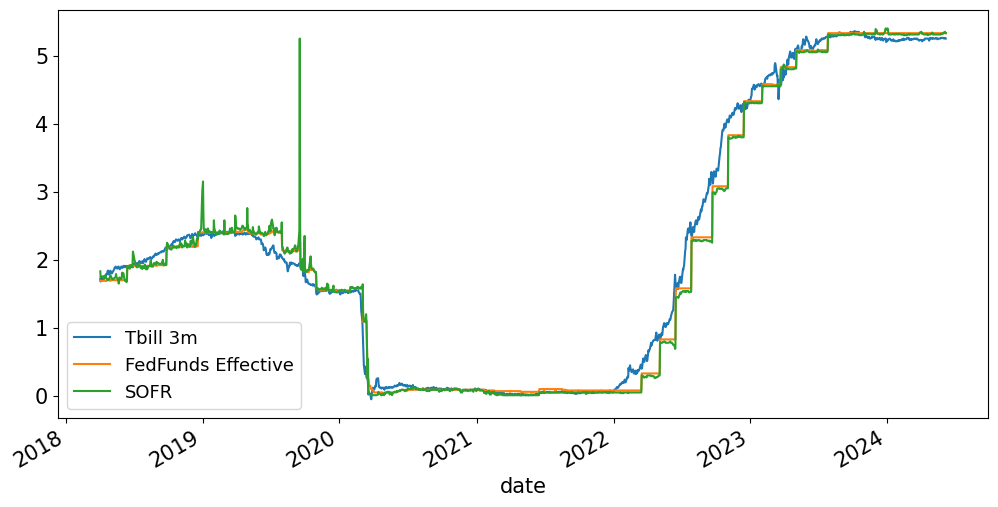

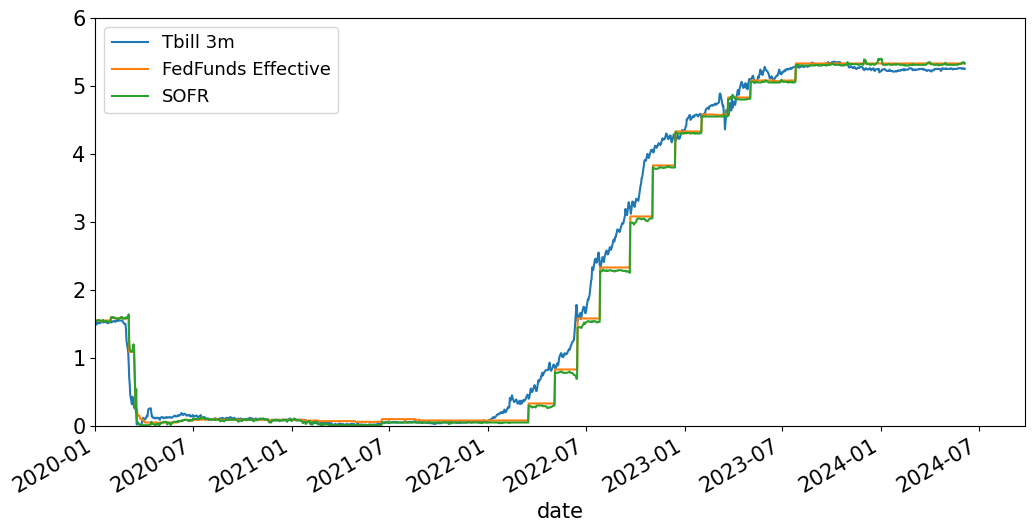

In [6]:
filename = '../data/ref_rates.xlsx'
refrates = pd.read_excel(filename,sheet_name='data').set_index('date').dropna()
refrates.columns = ['Tbill 3m','FedFunds Effective','SOFR']

refrates.plot()
plt.show()

refrates.plot(xlim=('2020-01-01',None),ylim=(0,6))
plt.show()

### Blip in Oct, 2019

SOFR spikes briefly.

This is not an error in the graph.

Stressed markets (institutional issues) caused this temporary spike.

- Reason for concern for SOFR as new benchmark.
- Has not had any such issue in the past few years, including Mar 2020 with COVID market jumps.

## More on SOFR


### Data:
- Published in the Fed H.15. Release
- Accessed easily in the Fed's FRED data platform
- Full methodology

https://www.newyorkfed.org/medialibrary/Microsites/arrc/files/2021/users-guide-to-sofr2021-update.pdf

### References
CME has a useful course to learn more about SOFR.

https://www.cmegroup.com/education/courses/introduction-to-sofr.html

- CME offers futures contracts based on SOFR
- So the material is somewhat focused on this aspect.

# Eurodollars

A Eurodollar is a dollar deposited in a bank outside the U.S. It is widely used in interest-rate futures.
* The Eurodollar rate is the interest earned on these dollar-denominated deposits held by banks outside the U.S, (in many countries besides Europe.)
* The Federal Reserve reports of the Eurodollar rate tend to match the LIBOR rate.
* The Fed publishes the Eurodollar rate on release H.15.

***

# Repo

A repurchase agreement (repo) is a contract where a dealer sells securities to another party with a deal to buy them back at a later date at a predetermined price.
* Repo is a common form of short-term borrowing.
* The difference between the selling price and the re-purchase price is the interest paid. This effective interest rate is the repo rate.
* The difference between the value of the collateral and the sell price is the haircut on the repo.
* The repo is, in essence, a collateralized loan.

### Example: 
Suppose an asset has a market value of \\$100 and a bank sells it for \\$80 with an agreement to repurchase it for \\$88.
* The repo rate is 10\%. $\frac{88−80}{80}$
* The haircut is 20\%. $\frac{100−80}{100}$

### Repo risk
Repo is considered very safe as the security transacted serves as collateral against default by either party.
* The most common repo is overnight. Longer term repos are referred to as term repo.
* Notably, the repo security is not subject to bankruptcy procedures. Either party can “walk away” if counterparty defaults.

## Why Repo?

Repo is part of the core infrastructure of financial transactions. 

What important functions does it serve?

## Repo References

### Repo Haircuts and Rates Distributions
https://www.federalreserve.gov/econres/notes/feds-notes/the-dynamics-of-the-us-overnight-triparty-repo-market-20210802.html

### SIFMA Charts
https://www.sifma.org/resources/research/reports/us-repo-market-chart-book/
https://www.sifma.org/wp-content/uploads/2022/02/SIFMA-Research-US-Repo-Markets-Chart-Book-2022.pdf

### Fed's declining use of Reverse Repo Rates
https://www.wsj.com/economy/central-banking/treasury-markets-are-losing-their-shock-absorber-75ed6ea1#

***

# Other Money Market Rates

## Certificates of Deposit

A certificates of deposit (CD) is a time deposit where the bank pays back principal and interest at the end of a fixed term.
* A CD is considered a savings account, and are thus FDIC insured.
* Deposits can not be withdrawn on demand.
* A large enough CD, (say \\$100,000,) is typically transferable,
so there is a market for these.
* Most traded CD’s have a very short maturity, (3 months or less.)

## Commercial Paper

Commercial paper is short-term, unsecured debt issued by firms.
* This is an important source of funding for nonfinancial firms.
* The paper typically matures in one to two months. It must be less than 270 days in order to avoid SEC registration and regulation.
* The paper is typically issued in \\$100,000 denominations.
* While the paper is unsecured, its short maturity makes it relatively safe.

## Money Market Funds

Money market funds provide small investors with access to money market securities.
* Money market mutual funds aim to keep net asset value (NAV), or share value constant at $1. The interest rate paid out fluctuates with the return of the assets in the fund.
* Money market mutual funds have become an important funding source for money market instruments.

The data

https://fred.stlouisfed.org/series/MMMFFAQ027S

### Risk of money market funds

Money market funds have been very successful in maintaining NAV at $1.
* Furthermore, money market funds have restrictions to enhance safety.
* Average maturity of securities had to be less than 90 days. In response to crisis, moved to 60.
* Enhanced rules on allocations, ratings of investments, etc.

### Money market funds in the crisis
If the share value of the market fund falls below \\$1, it is said to “break the buck.”
* Given the safe assets held by the fund, this is a very unlikely event. Until 2008, it had only happened once.
* When Lehman failed, its commercial paper was worthless. This caused a fund to break the buck and another to liquidate due to redemptions.
* The U.S. Treasury intervened and offered insurance like FDIC.
* At the end of 2008, the balance in money market funds was at $3,757. (Source: Flow of Funds. Board of Governors.)

***

# Risk-Free Rate?

Financial models often use a risk-free rate. 

This is often taken as a T-bill rate, but be careful.
* T-bills are used to fulfill a variety of regulatory requirements, and they are given preferential regulatory treatment.
* T-bills are given favorable tax treatment. (State and municipal taxes do not apply.)
* These facts cause extra demand for T-bills, driving the rates (artificially?) lower.

Models more sensitive to the interest rate will typically use SOFR, Eurodollar, or swap rates.